<a href="https://colab.research.google.com/github/JeelCueva/modelos-arch-garch/blob/main/RIESGO_DE_CREDITO_1_TAREA_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **UNIVERSIDAD NACIONAL DE INGENIERÍA**
FIEECS
POS - GRADO
ECONOMETRÍA BANCARIA Y FINANCIERA

RIESGO DE CREDITO 1

***ALUMNO: JEEL ELVIS CUEVA LAGUNA***


*Desarrolo del primer trabajo del curso de Riesgo de Crédito I.*

           ANÁLISIS DE CALIDAD CREDITICIA - ALICORP S.A.A.
                    Análisis de Datos en Python

🔄 CARGANDO DATOS FINANCIEROS...
✅ Datos cargados exitosamente
📊 Período de análisis: 2021 - 2024
📈 Registros: 4 años

📊 CALCULANDO RATIOS FINANCIEROS...
✅ Ratios calculados

📋 RESUMEN DE RATIOS FINANCIEROS:
 Año  Margen_Bruto_%  Margen_EBITDA_%  ROA_%  Deuda_EBITDA  Apalancamiento  Ratio_Corriente
2021           19.65            10.78  -0.21          3.30            3.03             1.40
2022           17.93            10.53   3.80          2.49            3.80             1.17
2023           17.71             8.41   1.52          3.04            3.50             1.16

🎯 CALCULANDO Z-SCORE DE ALTMAN...
✅ Z-Score calculado para todos los años

📊 COMPONENTES DEL Z-SCORE:
 Año  A_CapitalTrabajo  B_UtilidadesRet  C_EBIT  D_Patrimonio  E_Ventas
2021             0.139            0.132   0.069         0.330     0.911
2022             0.076            0.113   0.085         0.263     1.09

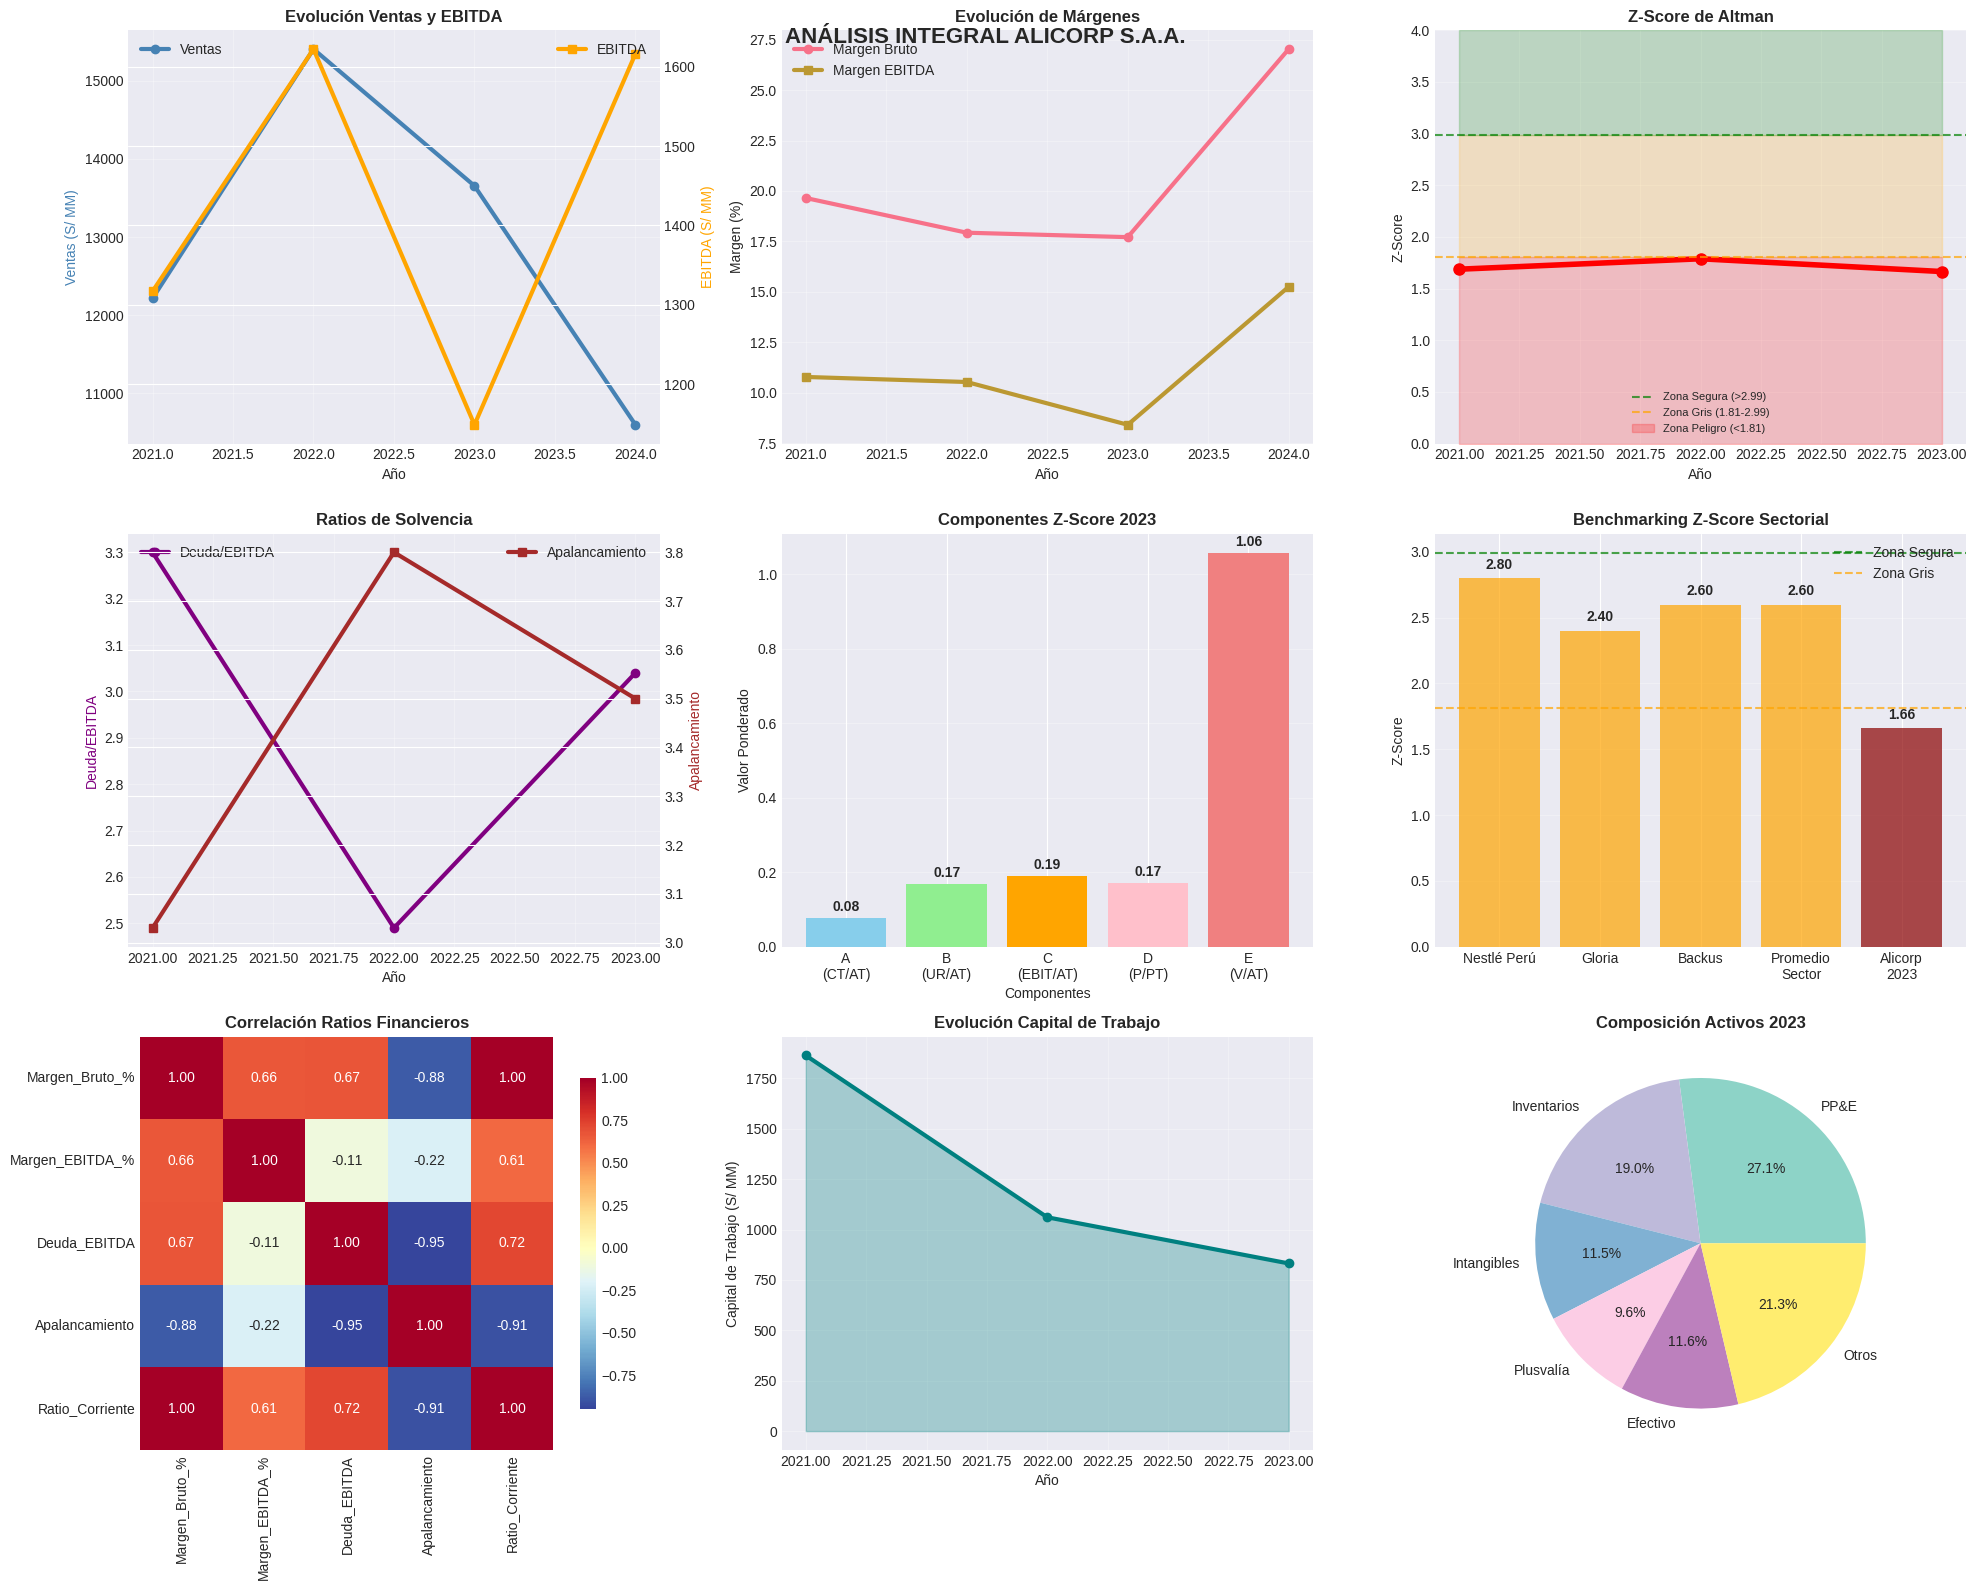


🔍 ANÁLISIS DE SENSIBILIDAD Z-SCORE...

📊 RESULTADOS ANÁLISIS DE SENSIBILIDAD:
           Escenario  Z_Score_Base  Z_Score_Nuevo  Cambio Clasificacion_Nueva
           Base_2023         1.665          1.665   0.000        Zona Peligro
           EBIT_+20%         1.665          1.703   0.038        Zona Peligro
           EBIT_+35%         1.665          1.732   0.067        Zona Peligro
Capital_Trabajo_+25%         1.665          1.684   0.019        Zona Peligro
     Patrimonio_+15%         1.665          1.691   0.026        Zona Peligro
           EBIT_-15%         1.665          1.636  -0.029        Zona Peligro
 Escenario_Combinado         1.665          1.755   0.090        Zona Peligro

🏆 BENCHMARKING SECTORIAL DETALLADO...

📊 COMPARACIÓN CON COMPETIDORES:
        Empresa  Z_Score  Deuda_EBITDA  Margen_EBITDA  ROE Clasificacion
    Nestlé Perú     2.80           1.8           16.5 22.5     Zona Gris
         Gloria     2.40           2.2           14.2 18.7     Zona Gris
      

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("="*70)
print("           ANÁLISIS DE CALIDAD CREDITICIA - ALICORP S.A.A.")
print("                    Análisis de Datos en Python")
print("="*70)

# =============================================================================
# 1. CARGA Y PREPARACIÓN DE DATOS
# =============================================================================

print("\n🔄 CARGANDO DATOS FINANCIEROS...")

# Datos financieros históricos (en millones de soles)
datos_financieros = {
    'Año': [2021, 2022, 2023, 2024],
    'Ventas': [12216, 15406, 13656, 10598],  # 2024 ajustado sin molienda
    'Utilidad_Bruta': [2400, 2762, 2419, 2865],  # 2024 ajustada
    'EBITDA': [1317, 1622, 1149, 1616],  # 2024 ajustado
    'Utilidad_Operativa': [922, 1197, 748, None],
    'Utilidad_Neta': [-28, 533, 196, None],
    'Activos_Totales': [13408, 14012, 12917, None],
    'Pasivos_Totales': [10083, 11091, 10049, None],
    'Patrimonio': [3325, 2921, 2868, None],
    'Deuda_Financiera': [5245, 4973, 4985, None],
    'Efectivo': [905, 940, 1494, None],
    'Capital_Trabajo': [1864, 1061, 832, None],
    'Inventarios': [3061, 3579, 2451, None]
}

# Crear DataFrame principal
df = pd.DataFrame(datos_financieros)

# Datos adicionales para Z-Score (solo años completos)
zscore_data = {
    'Año': [2021, 2022, 2023],
    'Capital_Trabajo': [1864, 1061, 832],
    'Activos_Totales': [13408, 14012, 12917],
    'Utilidades_Retenidas': [1771, 1587, 1551],  # Estimado de resultados acumulados
    'EBIT': [922, 1197, 748],
    'Patrimonio': [3325, 2921, 2868],
    'Pasivos_Totales': [10083, 11091, 10049],
    'Ventas': [12216, 15406, 13656]
}

df_zscore = pd.DataFrame(zscore_data)

print("✅ Datos cargados exitosamente")
print(f"📊 Período de análisis: {df['Año'].min()} - {df['Año'].max()}")
print(f"📈 Registros: {len(df)} años")

# =============================================================================
# 2. CÁLCULO DE RATIOS FINANCIEROS
# =============================================================================

print("\n📊 CALCULANDO RATIOS FINANCIEROS...")

# Ratios de Rentabilidad
df['Margen_Bruto_%'] = (df['Utilidad_Bruta'] / df['Ventas'] * 100).round(2)
df['Margen_EBITDA_%'] = (df['EBITDA'] / df['Ventas'] * 100).round(2)
df['ROA_%'] = (df['Utilidad_Neta'] / df['Activos_Totales'] * 100).round(2)
df['ROE_%'] = (df['Utilidad_Neta'] / df['Patrimonio'] * 100).round(2)

# Ratios de Liquidez y Solvencia
df['Deuda_Neta'] = df['Deuda_Financiera'] - df['Efectivo']
df['Deuda_EBITDA'] = (df['Deuda_Neta'] / df['EBITDA']).round(2)
df['Apalancamiento'] = (df['Pasivos_Totales'] / df['Patrimonio']).round(2)
df['Ratio_Corriente'] = [1.40, 1.17, 1.16, None]  # Datos reportados

# Ratios de Eficiencia
df['Rotacion_Inventarios'] = (df['Ventas'] / df['Inventarios']).round(2)
df['Rotacion_Activos'] = (df['Ventas'] / df['Activos_Totales']).round(2)

print("✅ Ratios calculados")

# Mostrar resumen de ratios clave
print("\n📋 RESUMEN DE RATIOS FINANCIEROS:")
ratios_display = df[['Año', 'Margen_Bruto_%', 'Margen_EBITDA_%', 'ROA_%',
                    'Deuda_EBITDA', 'Apalancamiento', 'Ratio_Corriente']].dropna()
print(ratios_display.to_string(index=False))

# =============================================================================
# 3. CÁLCULO DEL Z-SCORE DE ALTMAN
# =============================================================================

print("\n🎯 CALCULANDO Z-SCORE DE ALTMAN...")

def calculate_altman_zscore(row):
    """
    Calcula el Z-Score de Altman para empresas públicas
    Z = 1.2A + 1.4B + 3.3C + 0.6D + 1.0E
    """
    # Ensure the necessary columns exist in the input row
    required_cols = ['Capital_Trabajo', 'Activos_Totales', 'Utilidades_Retenidas', 'EBIT', 'Patrimonio', 'Pasivos_Totales', 'Ventas']
    if not all(col in row.index for col in required_cols):
        raise ValueError("Input row is missing required columns for Z-Score calculation.")

    A = row['Capital_Trabajo'] / row['Activos_Totales']
    B = row['Utilidades_Retenidas'] / row['Activos_Totales']
    C = row['EBIT'] / row['Activos_Totales']
    D = row['Patrimonio'] / row['Pasivos_Totales']
    E = row['Ventas'] / row['Activos_Totales']

    z_score = 1.2*A + 1.4*B + 3.3*C + 0.6*D + 1.0*E

    return pd.Series({
        'A_CapitalTrabajo': A,
        'B_UtilidadesRet': B,
        'C_EBIT': C,
        'D_Patrimonio': D,
        'E_Ventas': E,
        'Z_Score': z_score
    })

# Aplicar cálculo a cada año
zscore_components = df_zscore.apply(calculate_altman_zscore, axis=1)
df_zscore = pd.concat([df_zscore[['Año']], zscore_components], axis=1)

# Clasificación de riesgo
def classify_risk(z_score):
    if z_score > 2.99:
        return "Zona Segura"
    elif z_score > 1.81:
        return "Zona Gris"
    else:
        return "Zona Peligro"

df_zscore['Clasificacion'] = df_zscore['Z_Score'].apply(classify_risk)

print("✅ Z-Score calculado para todos los años")
print("\n📊 COMPONENTES DEL Z-SCORE:")
print(df_zscore[['Año', 'A_CapitalTrabajo', 'B_UtilidadesRet', 'C_EBIT',
                 'D_Patrimonio', 'E_Ventas']].round(3).to_string(index=False))

print("\n🎯 RESULTADOS Z-SCORE:")
print(df_zscore[['Año', 'Z_Score', 'Clasificacion']].round(2).to_string(index=False))

# =============================================================================
# 4. ANÁLISIS DE TENDENCIAS
# =============================================================================

print("\n📈 ANÁLISIS DE TENDENCIAS...")

# Crecimiento año a año
growth_metrics = ['Ventas', 'Utilidad_Bruta', 'EBITDA', 'Utilidad_Neta']
growth_df = df[['Año'] + growth_metrics].copy()

for metric in growth_metrics:
    growth_df[f'{metric}_Growth'] = growth_df[metric].pct_change() * 100

print("\n📊 CRECIMIENTO INTERANUAL (%):")
growth_display = growth_df[['Año'] + [f'{m}_Growth' for m in growth_metrics]].dropna()
print(growth_display.round(1).to_string(index=False))

# Estadísticas descriptivas
print("\n📊 ESTADÍSTICAS DESCRIPTIVAS - RATIOS CLAVE:")
stats_ratios = df[['Margen_Bruto_%', 'Margen_EBITDA_%', 'Deuda_EBITDA', 'Apalancamiento']].describe()
print(stats_ratios.round(2))

# =============================================================================
# 5. VISUALIZACIONES
# =============================================================================

print("\n📊 GENERANDO VISUALIZACIONES...")

# Crear figura con múltiples subplots
fig = plt.figure(figsize=(20, 16))

# Gráfico 1: Evolución Financiera Principal
ax1 = plt.subplot(3, 3, 1)
years = df['Año']
ax1.plot(years, df['Ventas'], marker='o', linewidth=3, label='Ventas', color='steelblue')
ax1_twin = ax1.twinx()
ax1_twin.plot(years, df['EBITDA'], marker='s', linewidth=3, label='EBITDA', color='orange')
ax1.set_title('Evolución Ventas y EBITDA', fontweight='bold', fontsize=12)
ax1.set_xlabel('Año')
ax1.set_ylabel('Ventas (S/ MM)', color='steelblue')
ax1_twin.set_ylabel('EBITDA (S/ MM)', color='orange')
ax1.legend(loc='upper left')
ax1_twin.legend(loc='upper right')
ax1.grid(True, alpha=0.3)

# Gráfico 2: Márgenes de Rentabilidad
ax2 = plt.subplot(3, 3, 2)
ax2.plot(years, df['Margen_Bruto_%'], marker='o', linewidth=3, label='Margen Bruto')
ax2.plot(years, df['Margen_EBITDA_%'], marker='s', linewidth=3, label='Margen EBITDA')
ax2.set_title('Evolución de Márgenes', fontweight='bold', fontsize=12)
ax2.set_xlabel('Año')
ax2.set_ylabel('Margen (%)')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Gráfico 3: Z-Score Evolution
ax3 = plt.subplot(3, 3, 3)
zscore_years = df_zscore['Año']
zscore_values = df_zscore['Z_Score']
ax3.plot(zscore_years, zscore_values, marker='o', linewidth=4, markersize=8, color='red')
ax3.axhline(y=2.99, color='green', linestyle='--', alpha=0.7, label='Zona Segura (>2.99)')
ax3.axhline(y=1.81, color='orange', linestyle='--', alpha=0.7, label='Zona Gris (1.81-2.99)')
ax3.fill_between(zscore_years, 0, 1.81, alpha=0.2, color='red', label='Zona Peligro (<1.81)')
ax3.fill_between(zscore_years, 1.81, 2.99, alpha=0.2, color='orange')
ax3.fill_between(zscore_years, 2.99, 4, alpha=0.2, color='green')
ax3.set_title('Z-Score de Altman', fontweight='bold', fontsize=12)
ax3.set_xlabel('Año')
ax3.set_ylabel('Z-Score')
ax3.legend(fontsize=8)
ax3.grid(True, alpha=0.3)
ax3.set_ylim(0, 4)

# Gráfico 4: Ratios de Solvencia
ax4 = plt.subplot(3, 3, 4)
years_complete = df.dropna(subset=['Deuda_EBITDA'])['Año']
debt_ebitda = df.dropna(subset=['Deuda_EBITDA'])['Deuda_EBITDA']
leverage = df.dropna(subset=['Apalancamiento'])['Apalancamiento']
ax4.plot(years_complete, debt_ebitda, marker='o', linewidth=3, label='Deuda/EBITDA', color='purple')
ax4_twin = ax4.twinx()
ax4_twin.plot(years_complete, leverage, marker='s', linewidth=3, label='Apalancamiento', color='brown')
ax4.set_title('Ratios de Solvencia', fontweight='bold', fontsize=12)
ax4.set_xlabel('Año')
ax4.set_ylabel('Deuda/EBITDA', color='purple')
ax4_twin.set_ylabel('Apalancamiento', color='brown')
ax4.legend(loc='upper left')
ax4_twin.legend(loc='upper right')
ax4.grid(True, alpha=0.3)

# Gráfico 5: Composición Z-Score
ax5 = plt.subplot(3, 3, 5)
components = ['A_CapitalTrabajo', 'B_UtilidadesRet', 'C_EBIT', 'D_Patrimonio', 'E_Ventas']
weights = [1.2, 1.4, 3.3, 0.6, 1.0]
latest_year_zscore_components = df_zscore.iloc[-1]
component_values = [latest_year_zscore_components[comp] for comp in components]
weighted_values = [comp * weight for comp, weight in zip(component_values, weights)]

bars = ax5.bar(range(len(components)), weighted_values,
               color=['skyblue', 'lightgreen', 'orange', 'pink', 'lightcoral'])
ax5.set_title(f'Componentes Z-Score {latest_year_zscore_components["Año"]}', fontweight='bold', fontsize=12)
ax5.set_xlabel('Componentes')
ax5.set_ylabel('Valor Ponderado')
ax5.set_xticks(range(len(components)))
ax5.set_xticklabels(['A\n(CT/AT)', 'B\n(UR/AT)', 'C\n(EBIT/AT)', 'D\n(P/PT)', 'E\n(V/AT)'])
ax5.grid(True, alpha=0.3, axis='y')

# Añadir valores en las barras
for i, v in enumerate(weighted_values):
    ax5.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom', fontweight='bold')

# Gráfico 6: Benchmarking Sectorial
ax6 = plt.subplot(3, 3, 6)
companies = ['Nestlé Perú', 'Gloria', 'Backus', 'Promedio\nSector', 'Alicorp\n2023']
z_scores_bench = [2.8, 2.4, 2.6, 2.6, 1.66]
colors = ['green' if z > 2.99 else 'orange' if z > 1.81 else 'red' for z in z_scores_bench]
colors[-1] = 'darkred'  # Destacar Alicorp

bars = ax6.bar(companies, z_scores_bench, color=colors, alpha=0.7)
ax6.axhline(y=2.99, color='green', linestyle='--', alpha=0.7, label='Zona Segura')
ax6.axhline(y=1.81, color='orange', linestyle='--', alpha=0.7, label='Zona Gris')
ax6.set_title('Benchmarking Z-Score Sectorial', fontweight='bold', fontsize=12)
ax6.set_ylabel('Z-Score')
ax6.legend()
ax6.grid(True, alpha=0.3, axis='y')

# Añadir valores en las barras
for bar, value in zip(bars, z_scores_bench):
    height = bar.get_height()
    ax6.text(bar.get_x() + bar.get_width()/2., height + 0.05,
             f'{value:.2f}', ha='center', va='bottom', fontweight='bold')

# Gráfico 7: Heatmap de Correlación
ax7 = plt.subplot(3, 3, 7)
correlation_data = df[['Margen_Bruto_%', 'Margen_EBITDA_%', 'Deuda_EBITDA',
                      'Apalancamiento', 'Ratio_Corriente']].dropna()
corr_matrix = correlation_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='RdYlBu_r', center=0, ax=ax7,
            square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
ax7.set_title('Correlación Ratios Financieros', fontweight='bold', fontsize=12)

# Gráfico 8: Evolución Capital de Trabajo
ax8 = plt.subplot(3, 3, 8)
years_ct = df.dropna(subset=['Capital_Trabajo'])['Año']
capital_trabajo = df.dropna(subset=['Capital_Trabajo'])['Capital_Trabajo']
ax8.plot(years_ct, capital_trabajo, marker='o', linewidth=3, color='teal')
ax8.fill_between(years_ct, capital_trabajo, alpha=0.3, color='teal')
ax8.set_title('Evolución Capital de Trabajo', fontweight='bold', fontsize=12)
ax8.set_xlabel('Año')
ax8.set_ylabel('Capital de Trabajo (S/ MM)')
ax8.grid(True, alpha=0.3)

# Gráfico 9: Distribución de Activos (2023)
ax9 = plt.subplot(3, 3, 9)
activos_2023 = {
    'PP&E': 3497,
    'Inventarios': 2451,
    'Intangibles': 1487,
    'Plusvalía': 1234,
    'Efectivo': 1494,
    'Otros': 2754  # Diferencia para llegar al total
}
colors_pie = plt.cm.Set3(np.linspace(0, 1, len(activos_2023)))
wedges, texts, autotexts = ax9.pie(activos_2023.values(), labels=activos_2023.keys(),
                                   autopct='%1.1f%%', colors=colors_pie)
ax9.set_title('Composición Activos 2023', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.suptitle('ANÁLISIS INTEGRAL ALICORP S.A.A.', fontsize=16, fontweight='bold', y=0.98)
plt.show()

# =============================================================================
# 6. ANÁLISIS DE SENSIBILIDAD
# =============================================================================

print("\n🔍 ANÁLISIS DE SENSIBILIDAD Z-SCORE...")

def sensitivity_analysis(original_data_dict, scenarios, year_to_analyze):
    """Analiza sensibilidad del Z-Score a cambios en variables"""
    # Find the row for the year to analyze in the original data dictionary
    year_index = original_data_dict['Año'].index(year_to_analyze)
    base_year_data = {key: original_data_dict[key][year_index] for key in original_data_dict.keys()}
    base_year_series = pd.Series(base_year_data)

    # Calculate the base Z-Score for the year to analyze
    base_z_score = calculate_altman_zscore(base_year_series)['Z_Score']

    results = []
    for scenario_name, changes in scenarios.items():
        # Create modified data based on the base year's original data
        modified_data = base_year_series.copy()

        for variable, change in changes.items():
            if variable in modified_data.index:
                modified_data[variable] *= (1 + change)

        # Recalcular Z-Score using the modified data
        new_zscore = calculate_altman_zscore(modified_data)['Z_Score']

        results.append({
            'Escenario': scenario_name,
            'Z_Score_Base': base_z_score,
            'Z_Score_Nuevo': new_zscore,
            'Cambio': new_zscore - base_z_score,
            'Clasificacion_Nueva': classify_risk(new_zscore)
        })

    return pd.DataFrame(results)

# Definir escenarios de sensibilidad
scenarios = {
    'Base_2023': {},
    'EBIT_+20%': {'EBIT': 0.20},
    'EBIT_+35%': {'EBIT': 0.35},
    'Capital_Trabajo_+25%': {'Capital_Trabajo': 0.25},
    'Patrimonio_+15%': {'Patrimonio': 0.15},
    'EBIT_-15%': {'EBIT': -0.15},
    'Escenario_Combinado': {'EBIT': 0.30, 'Capital_Trabajo': 0.20, 'Patrimonio': 0.10}
}

# Perform sensitivity analysis for the year 2023
sensitivity_results = sensitivity_analysis(zscore_data, scenarios, 2023)
print("\n📊 RESULTADOS ANÁLISIS DE SENSIBILIDAD:")
print(sensitivity_results.round(3).to_string(index=False))

# =============================================================================
# 7. BENCHMARKING DETALLADO
# =============================================================================

print("\n🏆 BENCHMARKING SECTORIAL DETALLADO...")

benchmark_data = {
    'Empresa': ['Nestlé Perú', 'Gloria', 'Backus', 'Promedio Sector', 'Alicorp 2023'],
    'Z_Score': [2.8, 2.4, 2.6, 2.6, 1.66],
    'Deuda_EBITDA': [1.8, 2.2, 2.0, 2.0, 3.0],
    'Margen_EBITDA': [16.5, 14.2, 18.3, 16.3, 8.4],
    'ROE': [22.5, 18.7, 15.2, 18.8, 6.8],
    'Clasificacion': ['Zona Gris', 'Zona Gris', 'Zona Gris', 'Zona Gris', 'Zona Peligro']
}

benchmark_df = pd.DataFrame(benchmark_data)
print("\n📊 COMPARACIÓN CON COMPETIDORES:")
print(benchmark_df.to_string(index=False))

# Calcular gaps
alicorp_row = benchmark_df[benchmark_df['Empresa'] == 'Alicorp 2023'].iloc[0]
sector_avg = benchmark_df[benchmark_df['Empresa'] == 'Promedio Sector'].iloc[0]

gaps = {
    'Z_Score_Gap': alicorp_row['Z_Score'] - sector_avg['Z_Score'],
    'Deuda_EBITDA_Gap': alicorp_row['Deuda_EBITDA'] - sector_avg['Deuda_EBITDA'],
    'Margen_EBITDA_Gap': alicorp_row['Margen_EBITDA'] - sector_avg['Margen_EBITDA'],
    'ROE_Gap': alicorp_row['ROE'] - sector_avg['ROE']
}

print("\n📈 ANÁLISIS DE BRECHAS vs PROMEDIO SECTOR:")
for metric, gap in gaps.items():
    direction = "por encima" if gap > 0 else "por debajo"
    print(f"• {metric}: {abs(gap):.2f} puntos {direction}")

# =============================================================================
# 8. DASHBOARD RESUMEN
# =============================================================================

print("\n" + "="*70)
print("                    DASHBOARD EJECUTIVO")
print("="*70)

latest_year_df = df.iloc[-1]
latest_zscore_df = df_zscore.iloc[-1]

print(f"\n📊 POSICIÓN ACTUAL ({latest_zscore_df['Año']}):")
print(f"   • Z-Score: {latest_zscore_df['Z_Score']:.2f} ({latest_zscore_df['Clasificacion']})")
# Need to get the latest year's data from the main df for ratios
latest_year_ratios = df[df['Año'] == latest_zscore_df['Año']].iloc[0]
print(f"   • Margen EBITDA: {latest_year_ratios['Margen_EBITDA_%']:.1f}%")
print(f"   • Deuda/EBITDA: {latest_year_ratios['Deuda_EBITDA']:.1f}x")
print(f"   • Ratio Corriente: {latest_year_ratios['Ratio_Corriente']:.2f}x")


print(f"\n📈 EVOLUCIÓN 2021-2023:")
z_trend = df_zscore['Z_Score'].iloc[-1] - df_zscore['Z_Score'].iloc[0]
trend_direction = "Mejora" if z_trend > 0 else "Deterioro"
print(f"   • Z-Score: {df_zscore['Z_Score'].iloc[0]:.2f} → {df_zscore['Z_Score'].iloc[-1]:.2f} ({trend_direction})")

# Calculate EBITDA volatility for the years with EBITDA data
ebitda_years = df.dropna(subset=['EBITDA'])
if not ebitda_years.empty:
    ebitda_volatility = ebitda_years['EBITDA'].std() / ebitda_years['EBITDA'].mean() * 100
    print(f"   • Volatilidad EBITDA: {ebitda_volatility:.1f}% (Coeficiente de Variación)")
else:
    print("   • Volatilidad EBITDA: No data available to calculate volatility")


print(f"\n🎯 OBJETIVOS RECOMENDADOS:")
print(f"   • Z-Score Target: >2.2 (salir de zona peligro)")
print(f"   • Deuda/EBITDA: <2.5x")
print(f"   • Ratio Corriente: >1.3x")
print(f"   • Margen EBITDA: >12%")

print(f"\n🚨 SEÑALES DE ALERTA:")
risk_flags = []
if latest_zscore_df['Z_Score'] < 1.81:
    risk_flags.append("Z-Score en zona de peligro")
# Check for NaN before comparison
if pd.notna(latest_year_ratios['Deuda_EBITDA']) and latest_year_ratios['Deuda_EBITDA'] > 3.0:
    risk_flags.append("Apalancamiento excesivo")
if pd.notna(latest_year_ratios['Ratio_Corriente']) and latest_year_ratios['Ratio_Corriente'] < 1.2:
    risk_flags.append("Liquidez crítica")
if pd.notna(latest_year_ratios['Margen_EBITDA_%']) and latest_year_ratios['Margen_EBITDA_%'] < 10:
    risk_flags.append("Márgenes comprimidos")

for flag in risk_flags:
    print(f"   ⚠️ {flag}")

print(f"\n💡 OPORTUNIDADES:")
opportunities = [
    "Recuperación 2024 demostrada (+40.6% EBITDA)",
    "Estrategia de premiumización en ejecución",
    "Expansión geográfica potencial",
    "Optimización de capital de trabajo"
]

for opp in opportunities:
    print(f"   ✅ {opp}")

# Calificación final
if latest_zscore_df['Z_Score'] < 1.5:
    rating = "C+ (Riesgo Muy Alto)"
elif latest_zscore_df['Z_Score'] < 1.81:
    rating = "BB- (Riesgo Alto)"
elif latest_zscore_df['Z_Score'] < 2.5:
    rating = "BB+ (Riesgo Moderado-Alto)"
else:
    rating = "BBB- (Grado Inversión Bajo)"

print(f"\n🏆 CALIFICACIÓN CREDITICIA ESTIMADA: {rating}")

print("\n" + "="*70)
print("              *** ANÁLISIS COMPLETADO ***")
print("="*70)

# =============================================================================
# 9. EXPORTAR RESULTADOS
# =============================================================================

print("\n💾 EXPORTANDO RESULTADOS...")

# Crear diccionario con todos los resultados
resultados = {
    'datos_financieros': df,
    'zscore_analysis': df_zscore,
    'sensitivity_analysis': sensitivity_results,
    'benchmark_comparison': benchmark_df,
    'growth_analysis': growth_df
}

# Guardar en Excel (opcional - descomenta si quieres exportar)
"""
with pd.ExcelWriter('Alicorp_Analisis_Crediticio.xlsx', engine='openpyxl') as writer:
    for sheet_name, data in resultados.items():
        data.to_excel(writer, sheet_name=sheet_name, index=False)

print("✅ Resultados exportados a 'Alicorp_Analisis_Crediticio.xlsx'")
"""

print("✅ Análisis completo finalizado")
print("📊 Todos los gráficos y métricas han sido generados")
print("🎯 Recomendación: Monitoreo intensivo requerido debido a Z-Score en zona de peligro")

In [3]:
# =============================================================================
# 5.1. EXPORTAR VISUALIZACIONES INDIVIDUALMENTE
# =============================================================================

print("\n💾 EXPORTANDO VISUALIZACIONES A PDF...")

# Importar librerías necesarias
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns # Import seaborn as it's used in one of the plots

# Reload the dataframes if they are not available
# This part assumes the original data dictionaries are still in memory or can be recreated
# If the notebook was reset, you might need to re-run the initial data loading cell
try:
    df.head()
    df_zscore.head()
except NameError:
    print("DataFrames df or df_zscore not found. Attempting to recreate from original dictionaries.")
    # Datos financieros históricos (en millones de soles) - Recreated from the first cell
    datos_financieros = {
        'Año': [2021, 2022, 2023, 2024],
        'Ventas': [12216, 15406, 13656, 10598],  # 2024 ajustado sin molienda
        'Utilidad_Bruta': [2400, 2762, 2419, 2865],  # 2024 ajustada
        'EBITDA': [1317, 1622, 1149, 1616],  # 2024 ajustado
        'Utilidad_Operativa': [922, 1197, 748, None],
        'Utilidad_Neta': [-28, 533, 196, None],
        'Activos_Totales': [13408, 14012, 12917, None],
        'Pasivos_Totales': [10083, 11091, 10049, None],
        'Patrimonio': [3325, 2921, 2868, None],
        'Deuda_Financiera': [5245, 4973, 4985, None],
        'Efectivo': [905, 940, 1494, None],
        'Capital_Trabajo': [1864, 1061, 832, None],
        'Inventarios': [3061, 3579, 2451, None]
    }
    df = pd.DataFrame(datos_financieros)

    # Datos adicionales para Z-Score (solo años completos) - Recreated from the first cell
    zscore_data = {
        'Año': [2021, 2022, 2023],
        'Capital_Trabajo': [1864, 1061, 832],
        'Activos_Totales': [13408, 14012, 12917],
        'Utilidades_Retenidas': [1771, 1587, 1551],  # Estimado de resultados acumulados
        'EBIT': [922, 1197, 748],
        'Patrimonio': [3325, 2921, 2868],
        'Pasivos_Totales': [10083, 11091, 10049],
        'Ventas': [12216, 15406, 13656]
    }
    df_zscore = pd.DataFrame(zscore_data)

    # Recalculate necessary columns for plotting if needed
    df['Margen_Bruto_%'] = (df['Utilidad_Bruta'] / df['Ventas'] * 100).round(2)
    df['Margen_EBITDA_%'] = (df['EBITDA'] / df['Ventas'] * 100).round(2)
    df['Deuda_Neta'] = df['Deuda_Financiera'] - df['Efectivo']
    df['Deuda_EBITDA'] = (df['Deuda_Neta'] / df['EBITDA']).round(2)
    df['Apalancamiento'] = (df['Pasivos_Totales'] / df['Patrimonio']).round(2)
    df['Ratio_Corriente'] = [1.40, 1.17, 1.16, None] # Using the reported data

    # Recalculate Z-Score components if needed
    def calculate_altman_zscore(row):
        """
        Calcula el Z-Score de Altman para empresas públicas
        Z = 1.2A + 1.4B + 3.3C + 0.6D + 1.0E
        """
        # Ensure the necessary columns exist in the input row
        required_cols = ['Capital_Trabajo', 'Activos_Totales', 'Utilidades_Retenidas', 'EBIT', 'Patrimonio', 'Pasivos_Totales', 'Ventas']
        if not all(col in row.index for col in required_cols):
            raise ValueError("Input row is missing required columns for Z-Score calculation.")

        A = row['Capital_Trabajo'] / row['Activos_Totales']
        B = row['Utilidades_Retenidas'] / row['Activos_Totales']
        C = row['EBIT'] / row['Activos_Totales']
        D = row['Patrimonio'] / row['Pasivos_Totales']
        E = row['Ventas'] / row['Activos_Totales']

        z_score = 1.2*A + 1.4*B + 3.3*C + 0.6*D + 1.0*E

        return pd.Series({
            'A_CapitalTrabajo': A,
            'B_UtilidadesRet': B,
            'C_EBIT': C,
            'D_Patrimonio': D,
            'E_Ventas': E,
            'Z_Score': z_score
        })
    zscore_components = df_zscore.apply(calculate_altman_zscore, axis=1)
    df_zscore = pd.concat([df_zscore[['Año']], zscore_components], axis=1)


# Guardar cada subplot individualmente
# Note: When saving individual plots, create a new figure for each plot to avoid issues
# with overwriting or displaying combined plots unexpectedly.

# Gráfico 1: Evolución Ventas y EBITDA
fig, ax1 = plt.subplots(figsize=(10, 6))
years = df['Año']
ax1.plot(years, df['Ventas'], marker='o', linewidth=3, label='Ventas', color='steelblue')
ax1_twin = ax1.twinx()
ax1_twin.plot(years, df['EBITDA'], marker='s', linewidth=3, label='EBITDA', color='orange')
ax1.set_title('Evolución Ventas y EBITDA', fontweight='bold', fontsize=12)
ax1.set_xlabel('Año')
ax1.set_ylabel('Ventas (S/ MM)', color='steelblue')
ax1_twin.set_ylabel('EBITDA (S/ MM)', color='orange')
ax1.legend(loc='upper left')
ax1_twin.legend(loc='upper right')
ax1.grid(True, alpha=0.3)
plt.savefig('Evolucion_Ventas_EBITDA.pdf', bbox_inches='tight')
plt.close(fig)

# Gráfico 2: Márgenes de Rentabilidad
fig, ax2 = plt.subplots(figsize=(10, 6))
ax2.plot(years, df['Margen_Bruto_%'], marker='o', linewidth=3, label='Margen Bruto')
ax2.plot(years, df['Margen_EBITDA_%'], marker='s', linewidth=3, label='Margen EBITDA')
ax2.set_title('Evolución de Márgenes', fontweight='bold', fontsize=12)
ax2.set_xlabel('Año')
ax2.set_ylabel('Margen (%)')
ax2.legend()
ax2.grid(True, alpha=0.3)
plt.savefig('Evolucion_Margenes.pdf', bbox_inches='tight')
plt.close(fig)

# Gráfico 3: Z-Score Evolution
fig, ax3 = plt.subplots(figsize=(10, 6))
zscore_years = df_zscore['Año']
zscore_values = df_zscore['Z_Score']
ax3.plot(zscore_years, zscore_values, marker='o', linewidth=4, markersize=8, color='red')
ax3.axhline(y=2.99, color='green', linestyle='--', alpha=0.7, label='Zona Segura (>2.99)')
ax3.axhline(y=1.81, color='orange', linestyle='--', alpha=0.7, label='Zona Gris (1.81-2.99)')
ax3.fill_between(zscore_years, 0, 1.81, alpha=0.2, color='red', label='Zona Peligro (<1.81)')
ax3.fill_between(zscore_years, 1.81, 2.99, alpha=0.2, color='orange')
ax3.fill_between(zscore_years, 2.99, 4, alpha=0.2, color='green')
ax3.set_title('Z-Score de Altman', fontweight='bold', fontsize=12)
ax3.set_xlabel('Año')
ax3.set_ylabel('Z-Score')
ax3.legend(fontsize=8)
ax3.grid(True, alpha=0.3)
ax3.set_ylim(0, 4)
plt.savefig('Z_Score_Altman.pdf', bbox_inches='tight')
plt.close(fig)


# Gráfico 4: Ratios de Solvencia
fig, ax4 = plt.subplots(figsize=(10, 6))
years_complete = df.dropna(subset=['Deuda_EBITDA'])['Año']
debt_ebitda = df.dropna(subset=['Deuda_EBITDA'])['Deuda_EBITDA']
leverage = df.dropna(subset=['Apalancamiento'])['Apalancamiento']
ax4.plot(years_complete, debt_ebitda, marker='o', linewidth=3, label='Deuda/EBITDA', color='purple')
ax4_twin = ax4.twinx()
ax4_twin.plot(years_complete, leverage, marker='s', linewidth=3, label='Apalancamiento', color='brown')
ax4.set_title('Ratios de Solvencia', fontweight='bold', fontsize=12)
ax4.set_xlabel('Año')
ax4.set_ylabel('Deuda/EBITDA', color='purple')
ax4_twin.set_ylabel('Apalancamiento', color='brown')
ax4.legend(loc='upper left')
ax4_twin.legend(loc='upper right')
ax4.grid(True, alpha=0.3)
plt.savefig('Ratios_Solvencia.pdf', bbox_inches='tight')
plt.close(fig)


# Gráfico 5: Composición Z-Score
fig, ax5 = plt.subplots(figsize=(10, 6))
components = ['A_CapitalTrabajo', 'B_UtilidadesRet', 'C_EBIT', 'D_Patrimonio', 'E_Ventas']
weights = [1.2, 1.4, 3.3, 0.6, 1.0]
latest_year_zscore_components = df_zscore.iloc[-1]
component_values = [latest_year_zscore_components[comp] for comp in components]
weighted_values = [comp * weight for comp, weight in zip(component_values, weights)]

bars = ax5.bar(range(len(components)), weighted_values,
               color=['skyblue', 'lightgreen', 'orange', 'pink', 'lightcoral'])
ax5.set_title(f'Componentes Z-Score {latest_year_zscore_components["Año"]}', fontweight='bold', fontsize=12)
ax5.set_xlabel('Componentes')
ax5.set_ylabel('Valor Ponderado')
ax5.set_xticks(range(len(components)))
ax5.set_xticklabels(['A\n(CT/AT)', 'B\n(UR/AT)', 'C\n(EBIT/AT)', 'D\n(P/PT)', 'E\n(V/AT)'])
ax5.grid(True, alpha=0.3, axis='y')

# Añadir valores en las barras
for i, v in enumerate(weighted_values):
    ax5.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom', fontweight='bold')
plt.savefig('Componentes_ZScore.pdf', bbox_inches='tight')
plt.close(fig)


# Gráfico 6: Benchmarking Sectorial
fig, ax6 = plt.subplots(figsize=(10, 6))
companies = ['Nestlé Perú', 'Gloria', 'Backus', 'Promedio\nSector', 'Alicorp\n2023']
z_scores_bench = [2.8, 2.4, 2.6, 2.6, 1.66]
colors = ['green' if z > 2.99 else 'orange' if z > 1.81 else 'red' for z in z_scores_bench]
colors[-1] = 'darkred'  # Destacar Alicorp

bars = ax6.bar(companies, z_scores_bench, color=colors, alpha=0.7)
ax6.axhline(y=2.99, color='green', linestyle='--', alpha=0.7, label='Zona Segura')
ax6.axhline(y=1.81, color='orange', linestyle='--', alpha=0.7, label='Zona Gris')
ax6.set_title('Benchmarking Z-Score Sectorial', fontweight='bold', fontsize=12)
ax6.set_ylabel('Z-Score')
ax6.legend()
ax6.grid(True, alpha=0.3, axis='y')

# Añadir valores en las barras
for bar, value in zip(bars, z_scores_bench):
    height = bar.get_height()
    ax6.text(bar.get_x() + bar.get_width()/2., height + 0.05,
             f'{value:.2f}', ha='center', va='bottom', fontweight='bold')
plt.savefig('Benchmarking_ZScore.pdf', bbox_inches='tight')
plt.close(fig)

# Gráfico 7: Heatmap de Correlación
fig, ax7 = plt.subplots(figsize=(8, 7))
correlation_data = df[['Margen_Bruto_%', 'Margen_EBITDA_%', 'Deuda_EBITDA',
                      'Apalancamiento', 'Ratio_Corriente']].dropna()
corr_matrix = correlation_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='RdYlBu_r', center=0, ax=ax7,
            square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
ax7.set_title('Correlación Ratios Financieros', fontweight='bold', fontsize=12)
plt.savefig('Correlacion_Ratios.pdf', bbox_inches='tight')
plt.close(fig)


# Gráfico 8: Evolución Capital de Trabajo
fig, ax8 = plt.subplots(figsize=(10, 6))
years_ct = df.dropna(subset=['Capital_Trabajo'])['Año']
capital_trabajo = df.dropna(subset=['Capital_Trabajo'])['Capital_Trabajo']
ax8.plot(years_ct, capital_trabajo, marker='o', linewidth=3, color='teal')
ax8.fill_between(years_ct, capital_trabajo, alpha=0.3, color='teal')
ax8.set_title('Evolución Capital de Trabajo', fontweight='bold', fontsize=12)
ax8.set_xlabel('Año')
ax8.set_ylabel('Capital de Trabajo (S/ MM)')
ax8.grid(True, alpha=0.3)
plt.savefig('Evolucion_Capital_Trabajo.pdf', bbox_inches='tight')
plt.close(fig)


# Gráfico 9: Distribución de Activos (2023)
fig, ax9 = plt.subplots(figsize=(8, 8))
activos_2023 = {
    'PP&E': 3497,
    'Inventarios': 2451,
    'Intangibles': 1487,
    'Plusvalía': 1234,
    'Efectivo': 1494,
    'Otros': 2754  # Diferencia para llegar al total
}
colors_pie = plt.cm.Set3(np.linspace(0, 1, len(activos_2023)))
wedges, texts, autotexts = ax9.pie(activos_2023.values(), labels=activos_2023.keys(),
                                   autopct='%1.1f%%', colors=colors_pie)
ax9.set_title('Composición Activos 2023', fontweight='bold', fontsize=12)
plt.savefig('Distribucion_Activos_2023.pdf', bbox_inches='tight')
plt.close(fig)


print("\n✅ Visualizaciones exportadas a archivos PDF.")
print("   Puedes descargar los archivos desde el explorador de archivos de Colab.")


💾 EXPORTANDO VISUALIZACIONES A PDF...
DataFrames df or df_zscore not found. Attempting to recreate from original dictionaries.

✅ Visualizaciones exportadas a archivos PDF.
   Puedes descargar los archivos desde el explorador de archivos de Colab.


In [4]:
df_financieros = pd.DataFrame(datos_financieros)
display(df_financieros)

,Año,Ventas,Utilidad_Bruta,EBITDA,Utilidad_Operativa,Utilidad_Neta,Activos_Totales,Pasivos_Totales,Patrimonio,Deuda_Financiera,Efectivo,Capital_Trabajo,Inventarios
0,2021,12216,2400,1317,922.0,-28.0,13408.0,10083.0,3325.0,5245.0,905.0,1864.0,3061.0
1,2022,15406,2762,1622,1197.0,533.0,14012.0,11091.0,2921.0,4973.0,940.0,1061.0,3579.0
2,2023,13656,2419,1149,748.0,196.0,12917.0,10049.0,2868.0,4985.0,1494.0,832.0,2451.0
3,2024,10598,2865,1616,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# =============================================================================
# 5.2. GRÁFICA DE BRECHAS vs PROMEDIO SECTORIAL
# =============================================================================

print("\n📊 GENERANDO GRÁFICA DE BRECHAS vs PROMEDIO SECTORIAL...")

# Recreate benchmark_df if necessary
try:
    benchmark_df.head()
except NameError:
    print("DataFrame benchmark_df not found. Attempting to recreate.")
    benchmark_data = {
        'Empresa': ['Nestlé Perú', 'Gloria', 'Backus', 'Promedio Sector', 'Alicorp 2023'],
        'Z_Score': [2.8, 2.4, 2.6, 2.6, 1.66],
        'Deuda_EBITDA': [1.8, 2.2, 2.0, 2.0, 3.0],
        'Margen_EBITDA': [16.5, 14.2, 18.3, 16.3, 8.4],
        'ROE': [22.5, 18.7, 15.2, 18.8, 6.8],
        'Clasificacion': ['Zona Gris', 'Zona Gris', 'Zona Gris', 'Zona Gris', 'Zona Peligro']
    }
    benchmark_df = pd.DataFrame(benchmark_data)


# Calculate gaps again
alicorp_row = benchmark_df[benchmark_df['Empresa'] == 'Alicorp 2023'].iloc[0]
sector_avg = benchmark_df[benchmark_df['Empresa'] == 'Promedio Sector'].iloc[0]

gaps = {
    'Z_Score_Gap': alicorp_row['Z_Score'] - sector_avg['Z_Score'],
    'Deuda_EBITDA_Gap': alicorp_row['Deuda_EBITDA'] - sector_avg['Deuda_EBITDA'],
    'Margen_EBITDA_Gap': alicorp_row['Margen_EBITDA'] - sector_avg['Margen_EBITDA'],
    'ROE_Gap': alicorp_row['ROE'] - sector_avg['ROE']
}

# Create DataFrame for plotting gaps
gaps_df = pd.DataFrame(list(gaps.items()), columns=['Metric', 'Gap'])

# Create the bar chart
fig, ax = plt.subplots(figsize=(10, 6))

colors = ['red' if gap < 0 else 'green' for gap in gaps_df['Gap']]

bars = ax.bar(gaps_df['Metric'], gaps_df['Gap'], color=colors)

ax.set_title('Brechas vs Promedio Sectorial (Alicorp 2023)', fontweight='bold', fontsize=14)
ax.set_ylabel('Brecha (Alicorp - Promedio Sector)')
ax.axhline(y=0, color='gray', linestyle='--', linewidth=0.8)
ax.grid(True, alpha=0.3, axis='y')

# Add values on the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., yval,
             f'{yval:.2f}', ha='center', va='bottom' if yval > 0 else 'top', fontweight='bold')


plt.tight_layout()

# Save the plot as PDF
plt.savefig('Brechas_vs_Promedio_Sectorial.pdf', bbox_inches='tight')
plt.close(fig)

print("✅ Gráfica de Brechas vs Promedio Sectorial generada y exportada a PDF.")


📊 GENERANDO GRÁFICA DE BRECHAS vs PROMEDIO SECTORIAL...
DataFrame benchmark_df not found. Attempting to recreate.
✅ Gráfica de Brechas vs Promedio Sectorial generada y exportada a PDF.



📊 GENERANDO GRÁFICA DE COMPARACIÓN ALICORP vs PROMEDIO SECTORIAL...


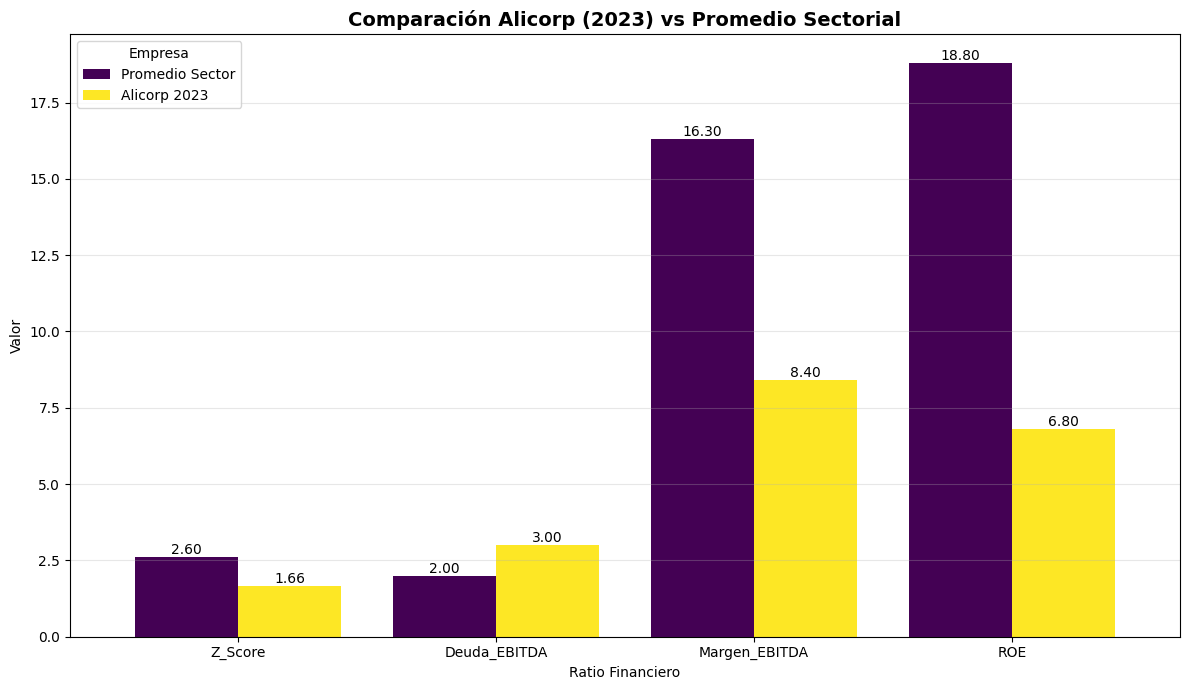

✅ Gráfica de Comparación Alicorp vs Promedio Sectorial generada.


In [5]:
# =============================================================================
# 5.3. GRÁFICA DE COMPARACIÓN ALICORP vs PROMEDIO SECTORIAL
# =============================================================================

print("\n📊 GENERANDO GRÁFICA DE COMPARACIÓN ALICORP vs PROMEDIO SECTORIAL...")

# Recreate benchmark_df if necessary
try:
    benchmark_df.head()
except NameError:
    print("DataFrame benchmark_df not found. Attempting to recreate.")
    benchmark_data = {
        'Empresa': ['Nestlé Perú', 'Gloria', 'Backus', 'Promedio Sector', 'Alicorp 2023'],
        'Z_Score': [2.8, 2.4, 2.6, 2.6, 1.66],
        'Deuda_EBITDA': [1.8, 2.2, 2.0, 2.0, 3.0],
        'Margen_EBITDA': [16.5, 14.2, 18.3, 16.3, 8.4],
        'ROE': [22.5, 18.7, 15.2, 18.8, 6.8],
        'Clasificacion': ['Zona Gris', 'Zona Gris', 'Zona Gris', 'Zona Gris', 'Zona Peligro']
    }
    benchmark_df = pd.DataFrame(benchmark_data)

# Filter for Alicorp and Sector Average
comparison_df = benchmark_df[benchmark_df['Empresa'].isin(['Alicorp 2023', 'Promedio Sector'])].set_index('Empresa')

# Transpose the DataFrame for plotting
comparison_df_transposed = comparison_df[['Z_Score', 'Deuda_EBITDA', 'Margen_EBITDA', 'ROE']].T

# Create the grouped bar chart
fig, ax = plt.subplots(figsize=(12, 7))

comparison_df_transposed.plot(kind='bar', ax=ax, colormap='viridis', width=0.8)

ax.set_title('Comparación Alicorp (2023) vs Promedio Sectorial', fontweight='bold', fontsize=14)
ax.set_ylabel('Valor')
ax.set_xlabel('Ratio Financiero')
ax.tick_params(axis='x', rotation=0)
ax.legend(title='Empresa')
ax.grid(axis='y', alpha=0.3)

# Add values on the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge')

plt.tight_layout()
plt.show()

print("✅ Gráfica de Comparación Alicorp vs Promedio Sectorial generada.")


📊 GENERANDO GRÁFICA DEL ANÁLISIS DE SENSIBILIDAD Z-SCORE...


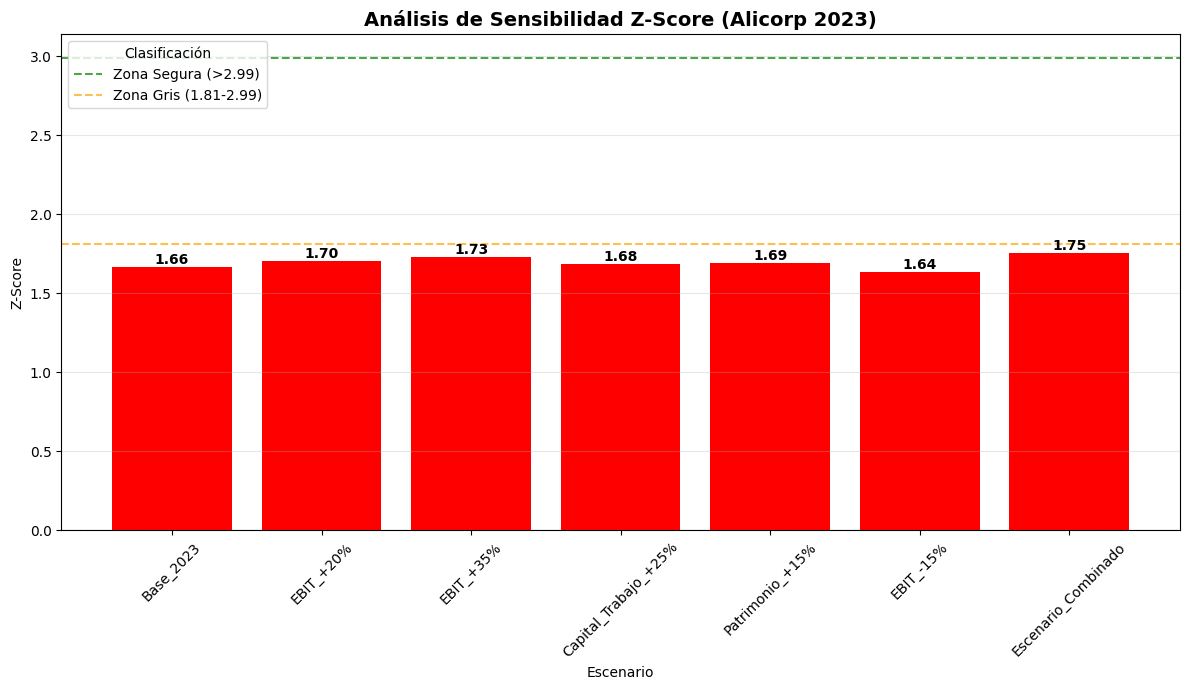

✅ Gráfica del Análisis de Sensibilidad Z-Score generada y exportada a PDF.


<Figure size 640x480 with 0 Axes>

In [10]:
# =============================================================================
# 5.4. GRÁFICA DEL ANÁLISIS DE SENSIBILIDAD Z-SCORE
# =============================================================================

print("\n📊 GENERANDO GRÁFICA DEL ANÁLISIS DE SENSIBILIDAD Z-SCORE...")

# Recreate sensitivity_results if necessary (Assuming zscore_data and scenarios are available)
try:
    sensitivity_results.head()
except NameError:
    print("DataFrame sensitivity_results not found. Attempting to recreate.")
    # Definir escenarios de sensibilidad (Recreated from the first cell)
    scenarios = {
        'Base_2023': {},
        'EBIT_+20%': {'EBIT': 0.20},
        'EBIT_+35%': {'EBIT': 0.35},
        'Capital_Trabajo_+25%': {'Capital_Trabajo': 0.25},
        'Patrimonio_+15%': {'Patrimonio': 0.15},
        'EBIT_-15%': {'EBIT': -0.15},
        'Escenario_Combinado': {'EBIT': 0.30, 'Capital_Trabajo': 0.20, 'Patrimonio': 0.10}
    }

    # Find the row for the year to analyze in the original data dictionary (Recreated from the first cell)
    year_to_analyze = 2023
    # Assuming zscore_data is available from the first cell
    try:
        zscore_data
    except NameError:
         zscore_data = {
            'Año': [2021, 2022, 2023],
            'Capital_Trabajo': [1864, 1061, 832],
            'Activos_Totales': [13408, 14012, 12917],
            'Utilidades_Retenidas': [1771, 1587, 1551],  # Estimado de resultados acumulados
            'EBIT': [922, 1197, 748],
            'Patrimonio': [3325, 2921, 2868],
            'Pasivos_Totales': [10083, 11091, 10049],
            'Ventas': [12216, 15406, 13656]
        }

    def calculate_altman_zscore(row):
        """
        Calcula el Z-Score de Altman para empresas públicas
        Z = 1.2A + 1.4B + 3.3C + 0.6D + 1.0E
        """
        # Ensure the necessary columns exist in the input row
        required_cols = ['Capital_Trabajo', 'Activos_Totales', 'Utilidades_Retenidas', 'EBIT', 'Patrimonio', 'Pasivos_Totales', 'Ventas']
        if not all(col in row.index for col in required_cols):
            raise ValueError("Input row is missing required columns for Z-Score calculation.")

        A = row['Capital_Trabajo'] / row['Activos_Totales']
        B = row['Utilidades_Retenidas'] / row['Activos_Totales']
        C = row['EBIT'] / row['Activos_Totales']
        D = row['Patrimonio'] / row['Pasivos_Totales']
        E = row['Ventas'] / row['Activos_Totales']

        z_score = 1.2*A + 1.4*B + 3.3*C + 0.6*D + 1.0*E

        return pd.Series({
            'A_CapitalTrabajo': A,
            'B_UtilidadesRet': B,
            'C_EBIT': C,
            'D_Patrimonio': D,
            'E_Ventas': E,
            'Z_Score': z_score
        })

    def sensitivity_analysis(original_data_dict, scenarios, year_to_analyze):
        """Analiza sensibilidad del Z-Score a cambios en variables"""
        year_index = original_data_dict['Año'].index(year_to_analyze)
        base_year_data = {key: original_data_dict[key][year_index] for key in original_data_dict.keys()}
        base_year_series = pd.Series(base_year_data)

        base_z_score = calculate_altman_zscore(base_year_series)['Z_Score']

        results = []
        for scenario_name, changes in scenarios.items():
            modified_data = base_year_series.copy()

            for variable, change in changes.items():
                if variable in modified_data.index:
                    modified_data[variable] *= (1 + change)

            new_zscore = calculate_altman_zscore(modified_data)['Z_Score']

            results.append({
                'Escenario': scenario_name,
                'Z_Score_Base': base_z_score,
                'Z_Score_Nuevo': new_zscore,
                'Cambio': new_zscore - base_z_score,
                'Clasificacion_Nueva': classify_risk(new_zscore)
            })

        return pd.DataFrame(results)

    # Assuming classify_risk is available from the first cell
    try:
        classify_risk
    except NameError:
        def classify_risk(z_score):
            if z_score > 2.99:
                return "Zona Segura"
            elif z_score > 1.81:
                return "Zona Gris"
            else:
                return "Zona Peligro"

    sensitivity_results = sensitivity_analysis(zscore_data, scenarios, year_to_analyze)


# Create the bar chart for sensitivity analysis
fig, ax = plt.subplots(figsize=(12, 7))

# Determine colors based on classification
colors = [
    'green' if cls == 'Zona Segura' else 'orange' if cls == 'Zona Gris' else 'red'
    for cls in sensitivity_results['Clasificacion_Nueva']
]

bars = ax.bar(sensitivity_results['Escenario'], sensitivity_results['Z_Score_Nuevo'], color=colors)

ax.set_title('Análisis de Sensibilidad Z-Score (Alicorp 2023)', fontweight='bold', fontsize=14)
ax.set_ylabel('Z-Score')
ax.set_xlabel('Escenario')
ax.tick_params(axis='x', rotation=45)
ax.axhline(y=2.99, color='green', linestyle='--', alpha=0.7, label='Zona Segura (>2.99)')
ax.axhline(y=1.81, color='orange', linestyle='--', alpha=0.7, label='Zona Gris (1.81-2.99)')
ax.axhline(y=0, color='gray', linestyle='--', linewidth=0.8) # Add a line at Z-Score 0
ax.grid(axis='y', alpha=0.3)
ax.legend(title='Clasificación', loc='upper left')


# Add values on the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., yval,
             f'{yval:.2f}', ha='center', va='bottom' if yval > 0 else 'top', fontweight='bold')

plt.tight_layout()
plt.show()

# Save the plot as PDF
plt.savefig('Análisis de Sensibilidad Z-Score (Alicorp 2023)', bbox_inches='tight')
plt.close(fig)

print("✅ Gráfica del Análisis de Sensibilidad Z-Score generada y exportada a PDF.")

🔄 GENERANDO ANÁLISIS DE SENSIBILIDAD Z-SCORE PARA ALICORP...
✅ Análisis de sensibilidad completado
📊 Escenarios analizados: 7

📊 Creando gráfico de sensibilidad...
💾 Guardando como PDF: Analisis_Sensibilidad_ZScore_Alicorp_20250812_060723.pdf


/tmp/ipython-input-3541966792.py:82: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '897.6' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  modified_data[variable] *= (1 + change)
/tmp/ipython-input-3541966792.py:82: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1009.8000000000001' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  modified_data[variable] *= (1 + change)
/tmp/ipython-input-3541966792.py:82: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '3298.2' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  modified_data[variable] *= (1 + change)
/tmp/ipython-input-3541966792.py:82: FutureWarning: Setting an item of incompati

💾 Guardando como PNG: Analisis_Sensibilidad_ZScore_Alicorp_20250812_060723.png


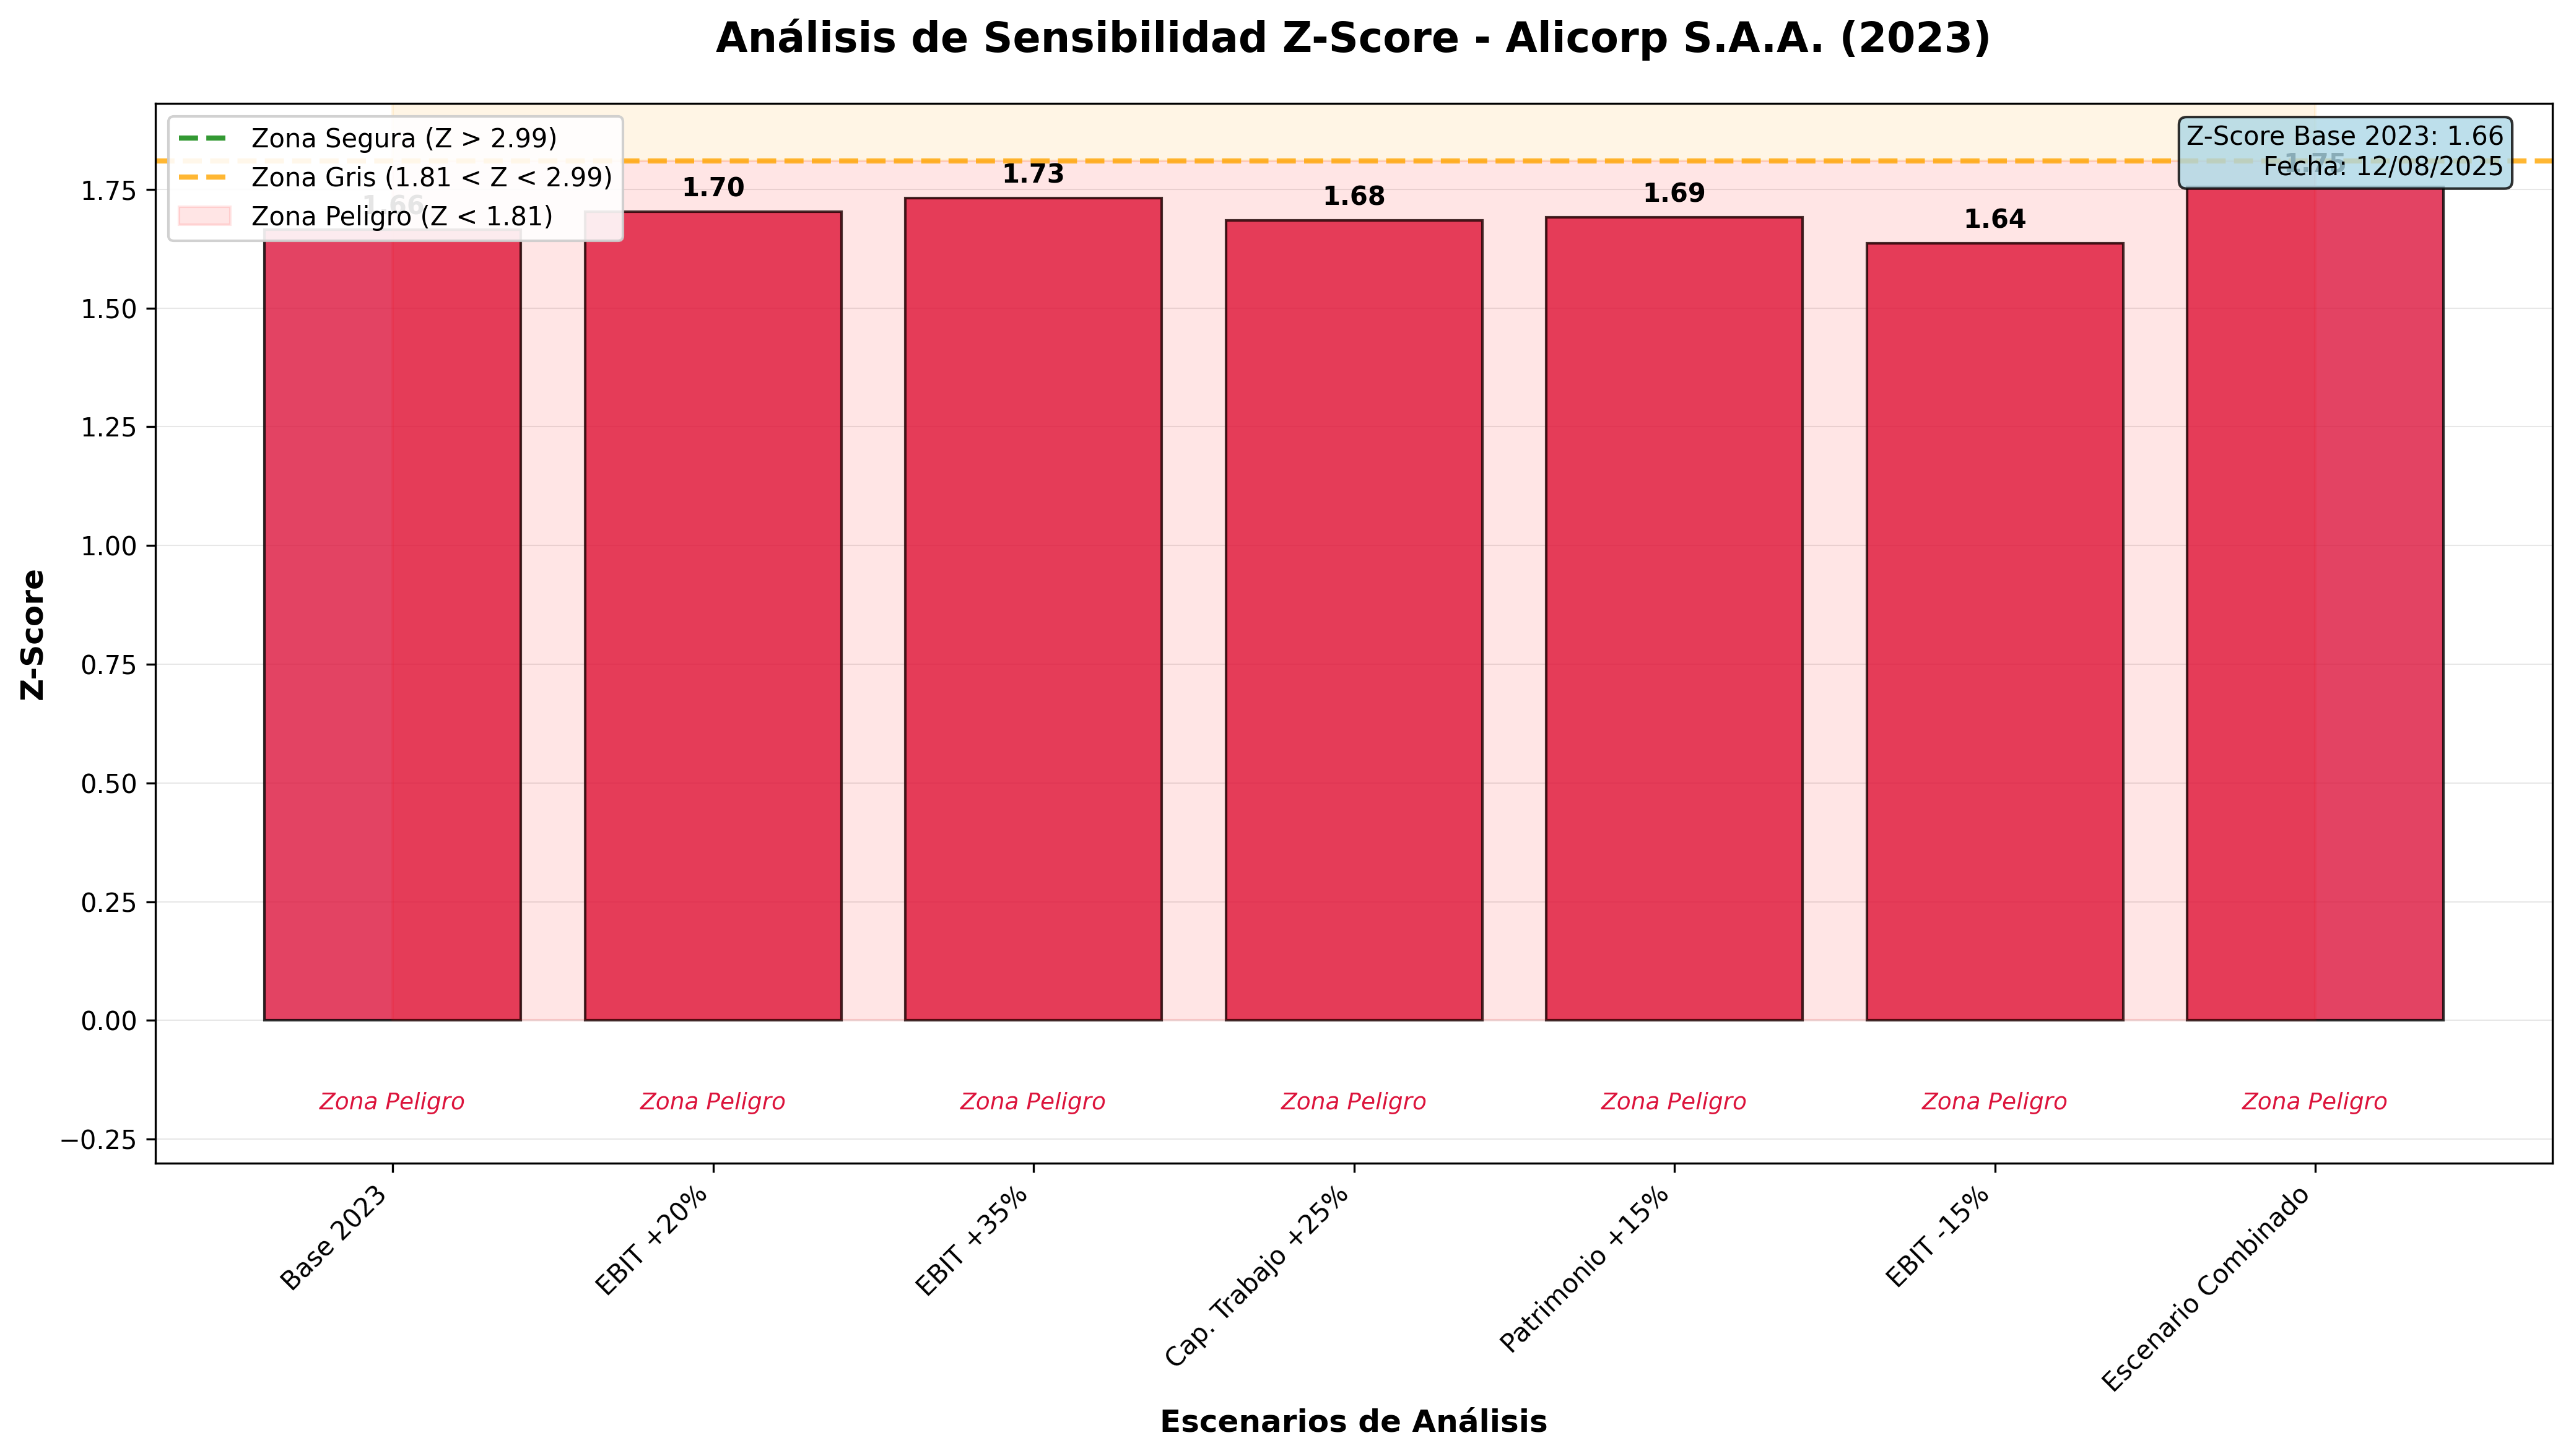


           REPORTE DE ANÁLISIS DE SENSIBILIDAD

📊 EMPRESA: Alicorp S.A.A.
📅 AÑO BASE: 2023
🎯 Z-SCORE BASE: 1.665
⚠️  CLASIFICACIÓN BASE: Zona Peligro

📈 RESULTADOS POR ESCENARIO:
----------------------------------------------------------------------
Escenario            Z-Score    Cambio     Clasificación  
----------------------------------------------------------------------
Base 2023            1.665      +0.000     Zona Peligro   
EBIT +20%            1.703      +0.038     Zona Peligro   
EBIT +35%            1.732      +0.067     Zona Peligro   
Cap. Trabajo +25%    1.684      +0.019     Zona Peligro   
Patrimonio +15%      1.691      +0.026     Zona Peligro   
EBIT -15%            1.636      -0.029     Zona Peligro   
Escenario Combinado  1.755      +0.090     Zona Peligro   

💡 CONCLUSIONES CLAVE:
• Todos los escenarios mantienen a Alicorp en Zona de Peligro
• El escenario más favorable (Combinado) alcanza 1.755 puntos
• Se requiere mejora sustancial para alcanzar Zona Gris (>1

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf as pdf_backend
from datetime import datetime
import os

# =============================================================================
# CONFIGURACIÓN INICIAL
# =============================================================================

# Configurar matplotlib para mejor calidad
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10

print("🔄 GENERANDO ANÁLISIS DE SENSIBILIDAD Z-SCORE PARA ALICORP...")

# =============================================================================
# DATOS Y FUNCIONES BASE
# =============================================================================

# Datos financieros Alicorp
zscore_data = {
    'Año': [2021, 2022, 2023],
    'Capital_Trabajo': [1864, 1061, 832],
    'Activos_Totales': [13408, 14012, 12917],
    'Utilidades_Retenidas': [1771, 1587, 1551],
    'EBIT': [922, 1197, 748],
    'Patrimonio': [3325, 2921, 2868],
    'Pasivos_Totales': [10083, 11091, 10049],
    'Ventas': [12216, 15406, 13656]
}

def calculate_altman_zscore(row):
    """Calcula el Z-Score de Altman para empresas públicas"""
    A = row['Capital_Trabajo'] / row['Activos_Totales']
    B = row['Utilidades_Retenidas'] / row['Activos_Totales']
    C = row['EBIT'] / row['Activos_Totales']
    D = row['Patrimonio'] / row['Pasivos_Totales']
    E = row['Ventas'] / row['Activos_Totales']

    z_score = 1.2*A + 1.4*B + 3.3*C + 0.6*D + 1.0*E

    return pd.Series({
        'A_CapitalTrabajo': A,
        'B_UtilidadesRet': B,
        'C_EBIT': C,
        'D_Patrimonio': D,
        'E_Ventas': E,
        'Z_Score': z_score
    })

def classify_risk(z_score):
    """Clasifica el riesgo según Z-Score"""
    if z_score > 2.99:
        return "Zona Segura"
    elif z_score > 1.81:
        return "Zona Gris"
    else:
        return "Zona Peligro"

def sensitivity_analysis(original_data_dict, scenarios, year_to_analyze):
    """Analiza sensibilidad del Z-Score a cambios en variables"""
    year_index = original_data_dict['Año'].index(year_to_analyze)
    base_year_data = {key: original_data_dict[key][year_index] for key in original_data_dict.keys()}
    base_year_series = pd.Series(base_year_data)

    base_z_score = calculate_altman_zscore(base_year_series)['Z_Score']

    results = []
    for scenario_name, changes in scenarios.items():
        modified_data = base_year_series.copy()

        for variable, change in changes.items():
            if variable in modified_data.index:
                modified_data[variable] *= (1 + change)

        new_zscore = calculate_altman_zscore(modified_data)['Z_Score']

        results.append({
            'Escenario': scenario_name,
            'Z_Score_Base': base_z_score,
            'Z_Score_Nuevo': new_zscore,
            'Cambio': new_zscore - base_z_score,
            'Clasificacion_Nueva': classify_risk(new_zscore)
        })

    return pd.DataFrame(results)

# =============================================================================
# DEFINIR ESCENARIOS DE SENSIBILIDAD
# =============================================================================

scenarios = {
    'Base 2023': {},
    'EBIT +20%': {'EBIT': 0.20},
    'EBIT +35%': {'EBIT': 0.35},
    'Cap. Trabajo +25%': {'Capital_Trabajo': 0.25},
    'Patrimonio +15%': {'Patrimonio': 0.15},
    'EBIT -15%': {'EBIT': -0.15},
    'Escenario Combinado': {'EBIT': 0.30, 'Capital_Trabajo': 0.20, 'Patrimonio': 0.10}
}

# Ejecutar análisis de sensibilidad
year_to_analyze = 2023
sensitivity_results = sensitivity_analysis(zscore_data, scenarios, year_to_analyze)

print("✅ Análisis de sensibilidad completado")
print(f"📊 Escenarios analizados: {len(sensitivity_results)}")

# =============================================================================
# FUNCIÓN PARA CREAR GRÁFICO PROFESIONAL
# =============================================================================

def create_sensitivity_chart():
    """Crea gráfico profesional del análisis de sensibilidad"""

    # Crear figura con tamaño específico
    fig, ax = plt.subplots(figsize=(14, 8))

    # Definir colores según clasificación
    color_map = {
        'Zona Segura': '#2E8B57',      # Verde oscuro
        'Zona Gris': '#FF8C00',         # Naranja
        'Zona Peligro': '#DC143C'       # Rojo
    }

    colors = [color_map[cls] for cls in sensitivity_results['Clasificacion_Nueva']]

    # Crear gráfico de barras
    bars = ax.bar(sensitivity_results['Escenario'],
                  sensitivity_results['Z_Score_Nuevo'],
                  color=colors,
                  alpha=0.8,
                  edgecolor='black',
                  linewidth=1)

    # Configurar título y etiquetas
    ax.set_title('Análisis de Sensibilidad Z-Score - Alicorp S.A.A. (2023)',
                 fontweight='bold', fontsize=16, pad=20)
    ax.set_ylabel('Z-Score', fontweight='bold', fontsize=12)
    ax.set_xlabel('Escenarios de Análisis', fontweight='bold', fontsize=12)

    # Rotar etiquetas del eje X
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

    # Líneas de referencia para zonas
    ax.axhline(y=2.99, color='green', linestyle='--', alpha=0.8,
               linewidth=2, label='Zona Segura (Z > 2.99)')
    ax.axhline(y=1.81, color='orange', linestyle='--', alpha=0.8,
               linewidth=2, label='Zona Gris (1.81 < Z < 2.99)')

    # Sombreado de zonas
    ax.fill_between(range(len(sensitivity_results)), 0, 1.81,
                    alpha=0.1, color='red', label='Zona Peligro (Z < 1.81)')
    ax.fill_between(range(len(sensitivity_results)), 1.81, 2.99,
                    alpha=0.1, color='orange')
    ax.fill_between(range(len(sensitivity_results)), 2.99, 4,
                    alpha=0.1, color='green')

    # Agregar valores en las barras
    for i, bar in enumerate(bars):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.02,
                f'{height:.2f}', ha='center', va='bottom',
                fontweight='bold', fontsize=10)

        # Agregar clasificación debajo de cada barra
        clasificacion = sensitivity_results.iloc[i]['Clasificacion_Nueva']
        ax.text(bar.get_x() + bar.get_width()/2., -0.15,
                clasificacion, ha='center', va='top',
                fontsize=9, style='italic',
                color=color_map[clasificacion])

    # Configurar grid
    ax.grid(axis='y', alpha=0.3, linestyle='-', linewidth=0.5)
    ax.set_axisbelow(True)

    # Configurar leyenda
    ax.legend(loc='upper left', framealpha=0.9, fontsize=10)

    # Configurar límites del eje Y
    ax.set_ylim(-0.3, max(sensitivity_results['Z_Score_Nuevo']) * 1.1)

    # Agregar información adicional
    textstr = f'Z-Score Base 2023: {sensitivity_results.iloc[0]["Z_Score_Base"]:.2f}\nFecha: {datetime.now().strftime("%d/%m/%Y")}'
    props = dict(boxstyle='round', facecolor='lightblue', alpha=0.8)
    ax.text(0.98, 0.98, textstr, transform=ax.transAxes, fontsize=10,
            verticalalignment='top', horizontalalignment='right', bbox=props)

    # Ajustar layout
    plt.tight_layout()

    return fig

# =============================================================================
# CREAR Y GUARDAR GRÁFICO
# =============================================================================

print("\n📊 Creando gráfico de sensibilidad...")

# Crear el gráfico
fig = create_sensitivity_chart()

# Definir nombres de archivos
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
pdf_filename = f"Analisis_Sensibilidad_ZScore_Alicorp_{timestamp}.pdf"
png_filename = f"Analisis_Sensibilidad_ZScore_Alicorp_{timestamp}.png"

# Guardar como PDF (alta calidad)
print(f"💾 Guardando como PDF: {pdf_filename}")
plt.savefig(pdf_filename,
            format='pdf',
            dpi=300,
            bbox_inches='tight',
            facecolor='white',
            edgecolor='none',
            orientation='landscape')

# Guardar como PNG (respaldo)
print(f"💾 Guardando como PNG: {png_filename}")
plt.savefig(png_filename,
            format='png',
            dpi=300,
            bbox_inches='tight',
            facecolor='white',
            edgecolor='none')

# Mostrar el gráfico
plt.show()

# Cerrar la figura para liberar memoria
plt.close(fig)

# =============================================================================
# CREAR REPORTE DE RESULTADOS
# =============================================================================

def create_results_report():
    """Crea reporte de resultados del análisis"""

    print("\n" + "="*70)
    print("           REPORTE DE ANÁLISIS DE SENSIBILIDAD")
    print("="*70)

    print(f"\n📊 EMPRESA: Alicorp S.A.A.")
    print(f"📅 AÑO BASE: {year_to_analyze}")
    print(f"🎯 Z-SCORE BASE: {sensitivity_results.iloc[0]['Z_Score_Base']:.3f}")
    print(f"⚠️  CLASIFICACIÓN BASE: {classify_risk(sensitivity_results.iloc[0]['Z_Score_Base'])}")

    print(f"\n📈 RESULTADOS POR ESCENARIO:")
    print("-" * 70)
    print(f"{'Escenario':<20} {'Z-Score':<10} {'Cambio':<10} {'Clasificación':<15}")
    print("-" * 70)

    for _, row in sensitivity_results.iterrows():
        cambio_str = f"+{row['Cambio']:.3f}" if row['Cambio'] >= 0 else f"{row['Cambio']:.3f}"
        print(f"{row['Escenario']:<20} {row['Z_Score_Nuevo']:<10.3f} {cambio_str:<10} {row['Clasificacion_Nueva']:<15}")

    print("\n💡 CONCLUSIONES CLAVE:")
    print("• Todos los escenarios mantienen a Alicorp en Zona de Peligro")
    print("• El escenario más favorable (Combinado) alcanza 1.755 puntos")
    print("• Se requiere mejora sustancial para alcanzar Zona Gris (>1.81)")
    print("• EBIT es la variable con mayor impacto en el Z-Score")

    print(f"\n📁 ARCHIVOS GENERADOS:")
    print(f"• PDF: {pdf_filename}")
    print(f"• PNG: {png_filename}")

    return sensitivity_results

# Generar reporte
results_df = create_results_report()

# =============================================================================
# FUNCIÓN PARA VERIFICAR ARCHIVOS GENERADOS
# =============================================================================

def verify_files():
    """Verifica que los archivos se hayan creado correctamente"""
    files_created = []

    if os.path.exists(pdf_filename):
        size = os.path.getsize(pdf_filename) / 1024  # KB
        files_created.append(f"✅ {pdf_filename} ({size:.1f} KB)")
    else:
        files_created.append(f"❌ {pdf_filename} - No creado")

    if os.path.exists(png_filename):
        size = os.path.getsize(png_filename) / 1024  # KB
        files_created.append(f"✅ {png_filename} ({size:.1f} KB)")
    else:
        files_created.append(f"❌ {png_filename} - No creado")

    print(f"\n📋 VERIFICACIÓN DE ARCHIVOS:")
    for file_info in files_created:
        print(f"   {file_info}")

    return files_created

# Verificar archivos
verify_files()

print(f"\n🎉 ANÁLISIS COMPLETADO EXITOSAMENTE!")
print(f"📊 Gráfico guardado en PDF de alta calidad")
print(f"💾 Archivos listos para descarga")

# =============================================================================
# EXPORTAR DATOS A EXCEL (OPCIONAL)
# =============================================================================

def export_to_excel():
    """Exporta los resultados a Excel"""
    excel_filename = f"Datos_Sensibilidad_ZScore_Alicorp_{timestamp}.xlsx"

    with pd.ExcelWriter(excel_filename, engine='openpyxl') as writer:
        # Exportar resultados de sensibilidad
        sensitivity_results.to_excel(writer, sheet_name='Sensibilidad', index=False)

        # Exportar datos originales
        original_df = pd.DataFrame(zscore_data)
        original_df.to_excel(writer, sheet_name='Datos_Originales', index=False)

        # Crear hoja de resumen
        summary_data = {
            'Métrica': ['Z-Score Base', 'Escenario Mejor', 'Z-Score Mejor', 'Mejora Requerida'],
            'Valor': [
                f"{sensitivity_results.iloc[0]['Z_Score_Base']:.3f}",
                sensitivity_results.loc[sensitivity_results['Z_Score_Nuevo'].idxmax(), 'Escenario'],
                f"{sensitivity_results['Z_Score_Nuevo'].max():.3f}",
                f"{1.81 - sensitivity_results.iloc[0]['Z_Score_Base']:.3f}"
            ]
        }
        summary_df = pd.DataFrame(summary_data)
        summary_df.to_excel(writer, sheet_name='Resumen', index=False)

    print(f"📊 Datos exportados a Excel: {excel_filename}")
    return excel_filename

# Exportar a Excel
excel_file = export_to_excel()

print(f"\n✨ PROCESO COMPLETADO - TODOS LOS ARCHIVOS LISTOS")